# 1.Problem Definition  
We're trying to find to predict Addiction level on social media based on some features.

# 2. Exploring our data

## Data Dictionary


* UserID: Unique identifier assigned to each user.
* Age: The user's age. - Gender: The user's gender (e.g., male, female, non-binary).
* Location: Geographic location of the user.
* Income: The user's income level.
* Debt: Amount of debt the user has.
* Owns Property: Indicates whether the user owns property.
* Profession: The user's occupation or job.
* Demographics: Statistical data about the user (e.g., age, gender, income).
* Platform: The platform the user is using (e.g., website, mobile app).
* Total Time Spent: The total time the user spends on the platform.
* Number of Sessions: The number of times the user has logged into the platform.
* Video ID: Unique identifier for a video.
* Video Category: The category or genre of the video.
* Video Length: Duration of the video.
* Engagement: User interaction with the video (e.g., likes, comments, shares).
* Importance Score: A score indicating how important the video is to the user.
* Time Spent On Video: The amount of time the user spends watching a video.
* Number of Videos Watched: The total number of videos watched by the user.
* Scroll Rate: The rate at which the user scrolls through content.
* Frequency: How often the user engages with the platform.
* Productivity Loss: The impact of platform usage on the user's productivity.
* Satisfaction: The user's satisfaction level with the platform or content.
* Watch Reason: The reason why the user is watching a video (e.g., entertainment, education).
* Device Type: The type of device the user is using (e.g., smartphone, tablet, desktop).
* OS: The operating system of the user's device (e.g., iOS, Android, Windows).
* Watch Time: The time of day when the user watches videos.
* Self Control: The user's ability to control their usage of the platform.
* Addiction Level: The user's level of dependency on the platform(in numbers).
* Addict_Level: The user's level of dependency on the platform; Mild,Moderate, Severe.
* Current Activity: What the user is doing while watching the video.
* Connection Type: The type of internet connection the user has (e.g., Wi-Fi, cellular).

 ## Importing necessary tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Importing the Evaluation Metrics
from sklearn.model_selection import train_test_split

# Classification Metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve



In [2]:

# Define the base estimators
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svc', SVC(probability=True))
]

# Initialize the StackingClassifier with the estimators
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

# Use the stacking_clf in your code
#"StackingClassifier": stacking_clf,

## Reading the data

In [3]:
df = pd.read_excel("Social-Media-Addiction-data.xlsx")
df.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType,Addict_level
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,7,Procrastination,Smartphone,Android,21:00:00,5,5,Commuting,Mobile Data,Severe
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,Habit,Computer,Android,17:00:00,7,3,At school,Wi-Fi,Moderate
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,4,Entertainment,Tablet,Android,14:00:00,8,2,At home,Mobile Data,Moderate
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,7,Habit,Smartphone,Android,21:00:00,5,5,Commuting,Mobile Data,Severe
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,2,Boredom,Smartphone,iOS,08:00:00,10,0,At home,Mobile Data,Mild


In [4]:
df= df.drop(["Addiction Level","UserID","Video ID"], axis=1)

In [ ]:
# Checking for missing values
df.isna().sum()

In [8]:
df.describe()

,Age,Income,Total Time Spent,Number of Sessions,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,ProductivityLoss,Satisfaction,Self Control
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.986000,59524.213000,151.406000,10.013000,15.214000,4997.159000,5.129000,14.973000,25.248000,49.774000,5.136000,4.864000,7.094000
std,13.497852,23736.212925,83.952637,5.380314,8.224953,2910.053701,2.582834,8.200092,14.029159,29.197798,2.122265,2.122265,2.058495
min,18.000000,20138.000000,10.000000,1.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,29.000000,38675.250000,78.000000,6.000000,8.000000,2415.750000,3.000000,8.000000,14.000000,23.000000,3.000000,4.000000,5.000000
50%,42.000000,58805.000000,152.000000,10.000000,15.000000,5016.000000,5.000000,15.000000,25.000000,50.000000,5.000000,5.000000,7.000000
75%,52.000000,79792.250000,223.000000,15.000000,22.000000,7540.250000,7.000000,22.000000,37.000000,74.000000,6.000000,7.000000,8.000000
max,64.000000,99676.000000,298.000000,19.000000,29.000000,9982.000000,9.000000,29.000000,49.000000,99.000000,9.000000,9.000000,10.000000


In [ ]:

# Group by 'Platform' and calculate the summary statistics
platform_analysis = (
    df
    .groupby('Platform')
    .agg(
        Avg_Productivity_Loss=('ProductivityLoss', lambda x: round(x.mean(skipna=True), 2)),
        Avg_Time_Spent=('Total Time Spent', lambda x: round(x.mean(skipna=True), 2)),
        Avg_Satisfaction=('Satisfaction', lambda x: round(x.mean(skipna=True), 2))
    )
    .reset_index()  # Convert the grouped DataFrame into a flat DataFrame
)

# The result is now a pandas DataFrame with the summarized data
print(platform_analysis)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   object
 2   Location                  1000 non-null   object
 3   Income                    1000 non-null   int64 
 4   Debt                      1000 non-null   bool  
 5   Owns Property             1000 non-null   bool  
 6   Profession                1000 non-null   object
 7   Demographics              1000 non-null   object
 8   Platform                  1000 non-null   object
 9   Total Time Spent          1000 non-null   int64 
 10  Number of Sessions        1000 non-null   int64 
 11  Video Category            1000 non-null   object
 12  Video Length              1000 non-null   int64 
 13  Engagement                1000 non-null   int64 
 14  Importance Score         

 ### Make a copy of the data


In [50]:

df_tmp = df.copy()
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   object
 2   Location                  1000 non-null   object
 3   Income                    1000 non-null   int64 
 4   Debt                      1000 non-null   bool  
 5   Owns Property             1000 non-null   bool  
 6   Profession                1000 non-null   object
 7   Demographics              1000 non-null   object
 8   Platform                  1000 non-null   object
 9   Total Time Spent          1000 non-null   int64 
 10  Number of Sessions        1000 non-null   int64 
 11  Video Category            1000 non-null   object
 12  Video Length              1000 non-null   int64 
 13  Engagement                1000 non-null   int64 
 14  Importance Score         

In [ ]:
df_tmp["Demographics"].value_counts().plot(kind="barh")

In [ ]:
df_tmp["Location"].value_counts()

In [ ]:
df_tmp["Platform"].value_counts().plot(kind="bar", color=["salmon", "lightblue", "lightgreen"])

In [ ]:
df_tmp["Age"].plot(kind="hist")

<Axes: xlabel='Addict_level'>

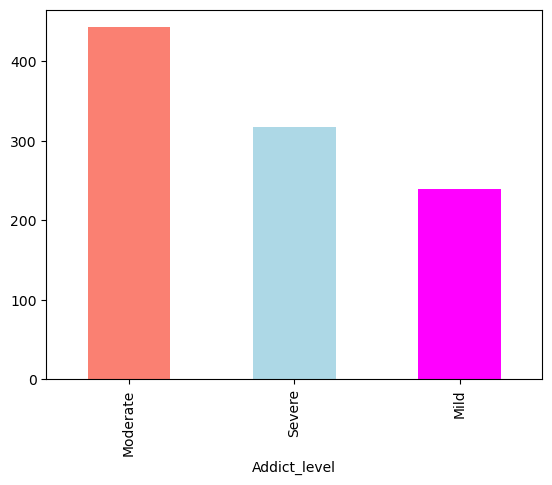

In [51]:
# Visualizing the 'Addict_level' (Target Variable)
df_tmp["Addict_level"].value_counts().plot(kind="bar", color=["salmon", "lightblue","magenta"])

In [14]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   object
 2   Location                  1000 non-null   object
 3   Income                    1000 non-null   int64 
 4   Debt                      1000 non-null   bool  
 5   Owns Property             1000 non-null   bool  
 6   Profession                1000 non-null   object
 7   Demographics              1000 non-null   object
 8   Platform                  1000 non-null   object
 9   Total Time Spent          1000 non-null   int64 
 10  Number of Sessions        1000 non-null   int64 
 11  Video Category            1000 non-null   object
 12  Video Length              1000 non-null   int64 
 13  Engagement                1000 non-null   int64 
 14  Importance Score         

## Datatype Prepocessing

In [52]:
# Find the columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

Gender
Location
Profession
Demographics
Platform
Video Category
Frequency
Watch Reason
DeviceType
OS
Watch Time
CurrentActivity
ConnectionType
Addict_level


In [53]:
# Find the columns which contain Integers
for label, content in df_tmp.items():
    if pd.api.types.is_integer_dtype(content):
        print(label)

Age
Income
Total Time Spent
Number of Sessions
Video Length
Engagement
Importance Score
Time Spent On Video
Number of Videos Watched
Scroll Rate
ProductivityLoss
Satisfaction
Self Control


In [54]:
# Find the columns which contain boolean
for label, content in df_tmp.items():
    if pd.api.types.is_bool_dtype(content):
        print(label)

Debt
Owns Property


In [55]:
# Covert Boolean to Integers
df_tmp["Debt"]= df_tmp["Debt"].astype(int)
df_tmp["Owns Property"]= df_tmp["Owns Property"].astype(int)

df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   object
 2   Location                  1000 non-null   object
 3   Income                    1000 non-null   int64 
 4   Debt                      1000 non-null   int32 
 5   Owns Property             1000 non-null   int32 
 6   Profession                1000 non-null   object
 7   Demographics              1000 non-null   object
 8   Platform                  1000 non-null   object
 9   Total Time Spent          1000 non-null   int64 
 10  Number of Sessions        1000 non-null   int64 
 11  Video Category            1000 non-null   object
 12  Video Length              1000 non-null   int64 
 13  Engagement                1000 non-null   int64 
 14  Importance Score         

In [56]:
# Convert all object dtype columns to category dtype
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = content.astype('category')

print(df_tmp.dtypes)
print(df_tmp)

Age                            int64
Gender                      category
Location                    category
Income                         int64
Debt                           int32
Owns Property                  int32
Profession                  category
Demographics                category
Platform                    category
Total Time Spent               int64
Number of Sessions             int64
Video Category              category
Video Length                   int64
Engagement                     int64
Importance Score               int64
Time Spent On Video            int64
Number of Videos Watched       int64
Scroll Rate                    int64
Frequency                   category
ProductivityLoss               int64
Satisfaction                   int64
Watch Reason                category
DeviceType                  category
OS                          category
Watch Time                  category
Self Control                   int64
CurrentActivity             category
C

In [57]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to categorical columns
label_encoders = {}
for label, content in df_tmp.items():
    if pd.api.types.is_categorical_dtype(content):
        le = LabelEncoder()
        df_tmp[label] = le.fit_transform(content)
        label_encoders[label] = le

print(df_tmp)

     Age  Gender  Location  Income  Debt  Owns Property  Profession  \
0     56       1         6   82812     1              1           2   
1     46       0         5   27999     0              1           0   
2     32       0         8   42436     0              1           2   
3     60       1         0   62963     1              0           7   
4     25       1         6   22096     0              1           4   
..   ...     ...       ...     ...   ...            ...         ...   
995   22       1         2   74254     1              1           5   
996   40       0         6   27006     0              0           7   
997   27       1         2   94218     1              1           7   
998   61       1         6   85344     1              0           5   
999   19       1         2   53840     1              1           8   

     Demographics  Platform  Total Time Spent  ...  ProductivityLoss  \
0               0         1                80  ...                 3   
1  

In [58]:
# Split data into X and y
X = df_tmp.drop("Addict_level", axis=1)
y = df_tmp["Addict_level"]

In [59]:
X

,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,Total Time Spent,...,Frequency,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,CurrentActivity,ConnectionType
0,56,1,6,82812,1,1,2,0,1,80,...,3,3,7,3,1,0,13,5,3,0
1,46,0,5,27999,0,1,0,1,1,228,...,0,5,5,2,0,0,8,7,1,1
2,32,0,8,42436,0,1,2,0,0,30,...,1,6,4,1,2,0,4,8,0,0
3,60,1,0,62963,1,0,7,0,3,101,...,3,3,7,2,1,0,13,5,3,0
4,25,1,6,22096,0,1,4,1,2,136,...,2,8,2,0,1,3,1,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,1,2,74254,1,1,5,0,2,144,...,0,9,1,3,1,3,9,10,2,0
996,40,0,6,27006,0,0,7,1,0,231,...,3,8,2,0,1,1,14,10,0,0
997,27,1,2,94218,1,1,7,0,2,165,...,3,9,1,3,1,3,14,10,3,0
998,61,1,6,85344,1,0,5,1,3,151,...,3,3,7,3,1,1,14,5,2,1


In [60]:
y

0      2
1      1
2      1
3      2
4      0
      ..
995    0
996    0
997    0
998    2
999    1
Name: Addict_level, Length: 1000, dtype: int32

In [ ]:
df_tmp.info()

(29.5, -0.5)

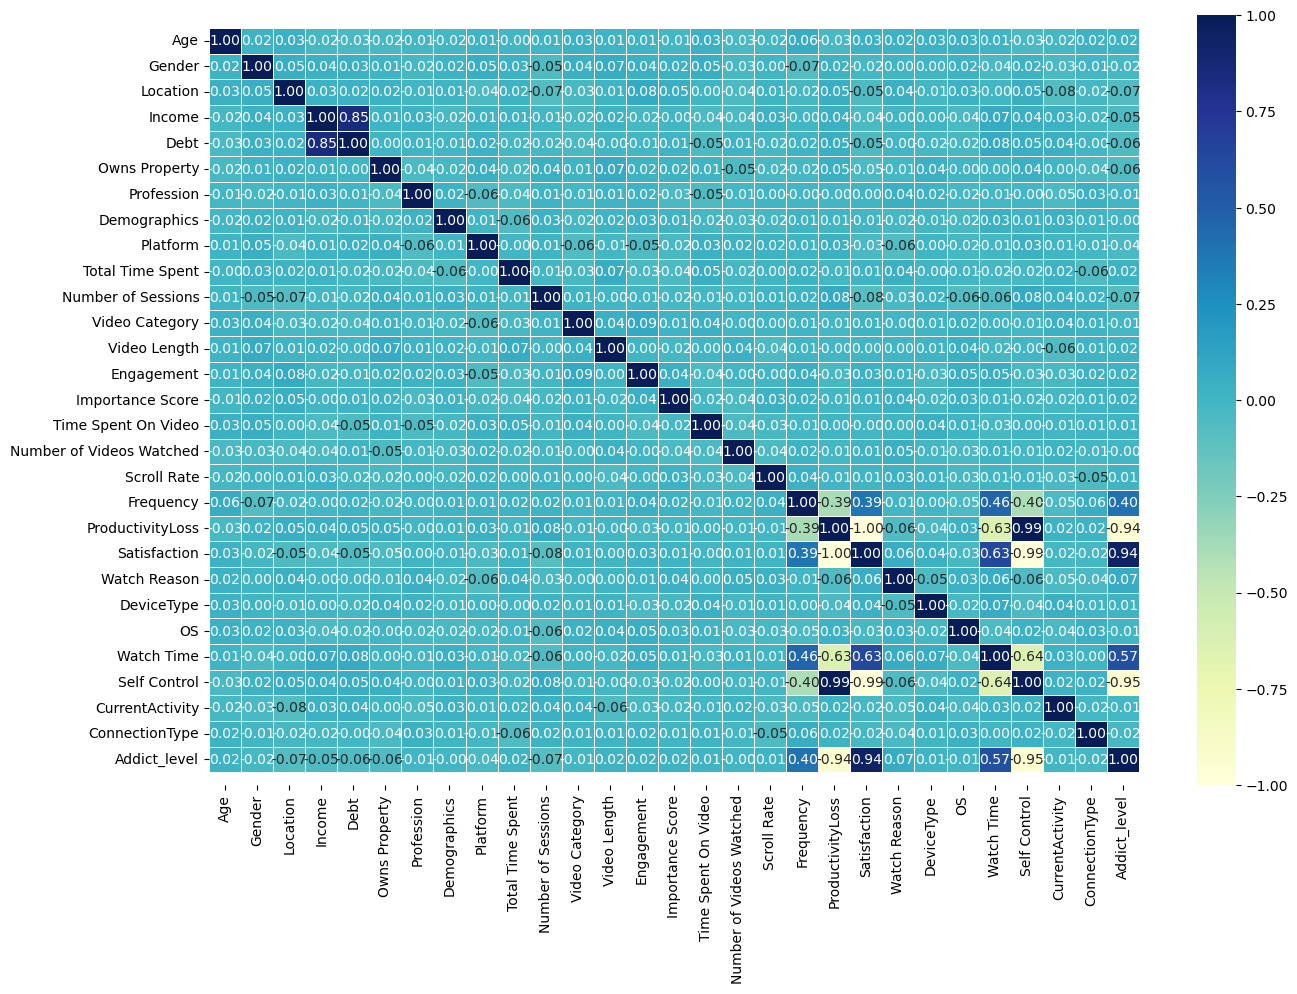

In [61]:
# Making Correlation Matrix a little prettier

corr_matrix = df_tmp.corr()
fig, ax = plt.subplots (figsize= (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot= True,
                 linewidths= 0.5,
                 fmt= ".2f",
                 cmap= "YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5)

In [ ]:
# Exporting preprocessed data
df_tmp.to_excel("prepocessed data.xlsx", index=False)

# 3. Modelling 

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Fitting the models and scoring it

### Learning Stacking Classifier

### Experimenting with Classifiction models

In [67]:
## Put models in a dictionary

models = {"Logistic Regression":LogisticRegression(),
          "Random Forest":RandomForestClassifier(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "StackingClassifier": stacking_clf,
          "svc": SVC(probability=True),
          "KNeighborsClassifier":KNeighborsClassifier()}

# Create a function to fit and score models

def fit_and_score (models, X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training  labels
    y_test : testing  labels
    """
    # set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores= {}
    #Loop through models
    for name, model in models.items():
        #fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores



In [68]:


# Ensure data is in the correct format
X_train = np.array(X_train) if not isinstance(X_train, np.ndarray) else X_train
X_test = np.array(X_test) if not isinstance(X_test, np.ndarray) else X_test
y_train = np.array(y_train).ravel() if not isinstance(y_train, np.ndarray) else y_train.ravel()
y_test = np.array(y_test).ravel() if not isinstance(y_test, np.ndarray) else y_test.ravel()

# Verify the shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Now call the fit_and_score function
model_scored = fit_and_score(models, X_train, X_test, y_train, y_test)

X_train shape: (700, 28)
X_test shape: (300, 28)
y_train shape: (700,)
y_test shape: (300,)


c:\Users\OPEYEMI\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
model_scores = fit_and_score(models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

c:\Users\OPEYEMI\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.43333333333333335,
 'Random Forest': 0.9966666666666667,
 'DecisionTreeClassifier': 1.0,
 'StackingClassifier': 1.0,
 'svc': 0.43333333333333335,
 'KNeighborsClassifier': 0.34}

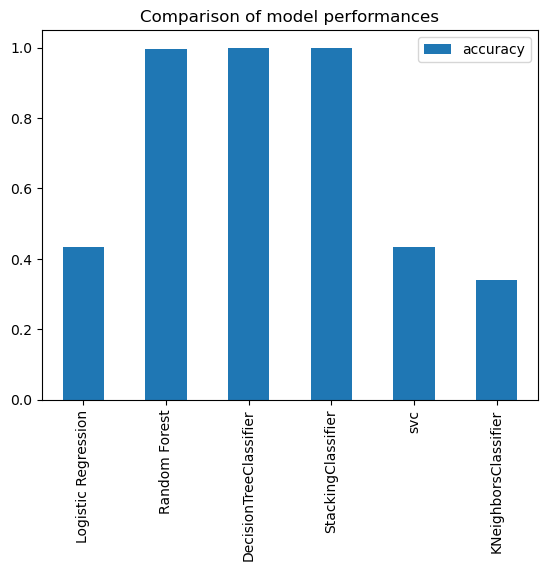

In [70]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()
plt.title("Comparison of model performances");

### Saving our model scores

In [ ]:
# Convert the dictionary to a DataFrame with an index
model_scores_f = pd.DataFrame(model_scores, index=[0])
model_scores_f
# Save the DataFrame to a CSV file
#model_scores_f.to_csv('model_scores.csv', index=False)

### HyperParameter Tuning

In [75]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42)


param_distributions = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                               n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 30,
 'bootstrap': True}

In [ ]:
# Using GridSearchCV to find the best parameters

param_distributions = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    #'bootstrap': [True, False]
}


rf_grid = GridSearchCV(estimator=rf, param_grid=param_distributions, cv=5,n_jobs=-1, verbose=1, scoring='accuracy')
rf_grid.fit(X_train, y_train)
# Find the best parameters
rf_grid.best_params_
rf_grid.best_score_

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


KeyboardInterrupt: 

In [76]:
rf_random.score(X_test, y_test)

0.9966666666666667

In [77]:
best_rf = RandomForestClassifier(n_estimators=200,
                                  min_samples_split=5,
                                    min_samples_leaf=1,
                                    max_features='log2',
                                    max_depth=30,
                                    bootstrap=True,)
best_rf.fit(X_train, y_train)
best_rf.score(X_test, y_test)

0.9966666666666667

## Feature Importance

now we want to find out which features are really important in producing the target Variables

In [73]:


# Assuming original_data is your original DataFrame
X_train = df.copy()

# Now you can access the columns attribute
feature_names = X_train.columns

In [75]:

# Convert X_train to a DataFrame if it is a NumPy array
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns= [
        "UserID", "Age", "Location", "Income", "Debt", "Owns Property", "Profession", 
        "Demographics", "Platform", "Total Time Spent", "Number of Sessions", "Video ID", 
        "Video Category", "Video Length", "Engagement", "Importance Score", 
        "Time Spent On Video", "Number of Videos Watched", "Scroll Rate", "Frequency", 
        "Productivity Loss", "Satisfaction", "Watch Reason", "Device Type", "OS", 
        "Watch Time", "Self Control", "Addiction Level", "Current Activity", "Connection Type"
    ])

# Now you can access the columns attribute
feature_names = X_train.columns

In [ ]:
# Ensure X_train only contains feature columns
X_train_features = X_train.drop(columns=["Addiction Level"])

# Extract the coefficients
coefficients = Reg_model.coef_

# Pair coefficients with feature names
feature_importance = pd.DataFrame({
    'Feature': X_train_features.columns,
    'Importance': coefficients
})

print(feature_importance)

In [ ]:
# Find feature importance of our best model
len(Reg_model.coef_), len(X_train.columns)

In [ ]:
# Helper function for plotting feature importance
def plot_features (columns, importances, n=20):
    df =(pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()
    ax.set_title("Feature Importance chart")

# Ensure X_train only contains feature columns
X_train_features = X_train.drop(columns=["Addiction Level"])

# Plot the feature importances
plot_features(X_train_features.columns, Reg_model.coef_)

In [ ]:
type(X_train)

In [ ]:
len(X_train.columns)

In [ ]:
X_train

## Saving Models


In [ ]:
# Saving the Classification model
import joblib

# Save the model to a file
joblib.dump(stacking_clf, 'models/stacking_clf_model.pkl')



### Evaluating the Classification `StackingClassifier`() model

In [ ]:
stacking_clf.final_estimator_.coef_

In [ ]:
# Match coef's of features to columns

feature_dict = dict(zip(df.columns,list(stacking_clf.final_estimator_.coef_[0])))
feature_dict

Feature Importance Chart for Stacking Classifier Model

In [ ]:
# Visualize feature importance

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance for Classification model", legend = False)

# Final Findings

from the Feature Importance Chart of the two paths(Regression and Classification), it could be deduced that this is a Regression Problem.

* Why would userID rank high in classification but low in regression?